In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\DataScience\Assignment\PCA\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Data Insights

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# Scaling down the data

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [5]:
y = df['Type']
df2 = sc.fit_transform(df.iloc[:,1:])
df2 = pd.DataFrame(df2)

# Model Building

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA()
pcs = pca.fit_transform(df2)

In [8]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [9]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

### Scree plot

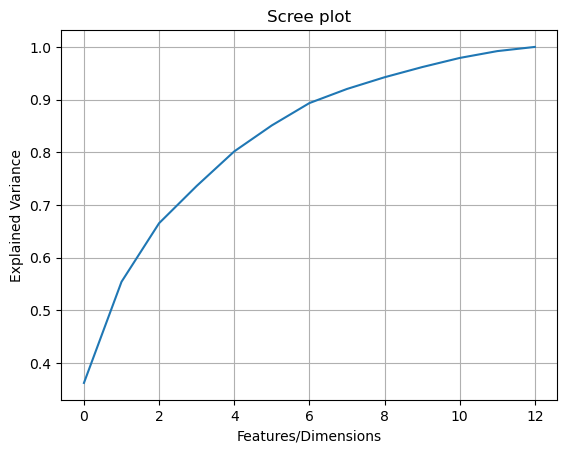

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree plot')
plt.xlabel('Features/Dimensions')
plt.ylabel('Explained Variance')
plt.grid()

### Select PCs

In [11]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(df2)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [12]:
data = pd.DataFrame(pcs, columns=['PC1', 'PC2', 'PC3'])

In [13]:
data['Type'] = y
data

,PC1,PC2,PC3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [14]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

# Visualization

<Axes: xlabel='PC2', ylabel='PC3'>

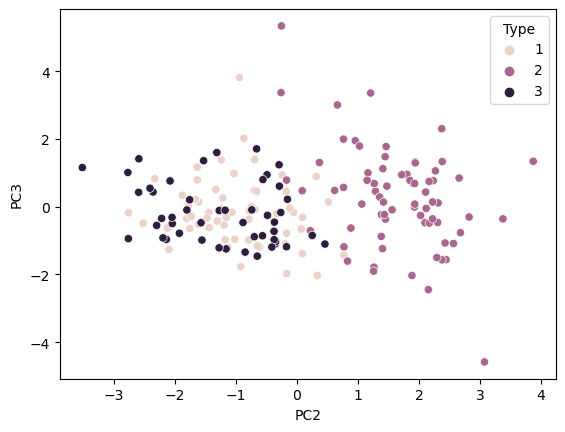

In [15]:
sns.scatterplot(data=data,x='PC2',y='PC3', hue='Type')

<Axes: xlabel='PC1', ylabel='PC3'>

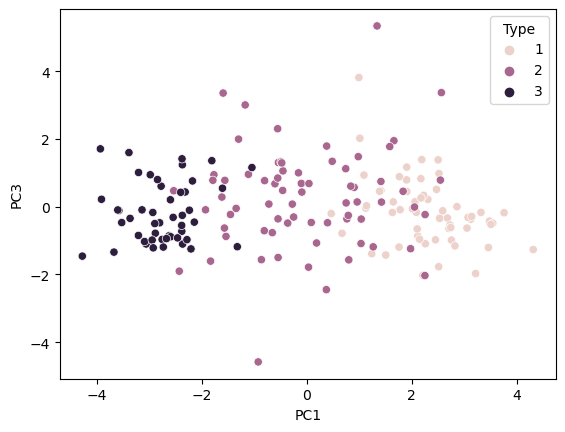

In [16]:
sns.scatterplot(data=data,x='PC1',y='PC3', hue='Type')

<Axes: xlabel='PC1', ylabel='PC2'>

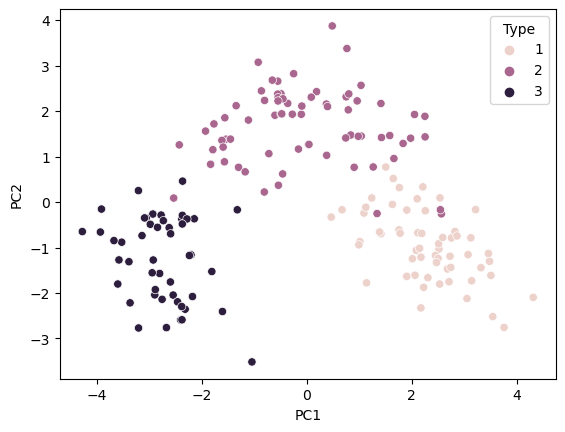

In [17]:
sns.scatterplot(data=data,x='PC1',y='PC2', hue='Type')

# Hierarchical Clustering

In [18]:
data2 = data.drop(columns='Type')

In [19]:
data2

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


### Finding optimal number of clusters using dendrograms

In [24]:
from scipy.cluster import hierarchy

In [25]:
lk = hierarchy.linkage(data2, method='ward')

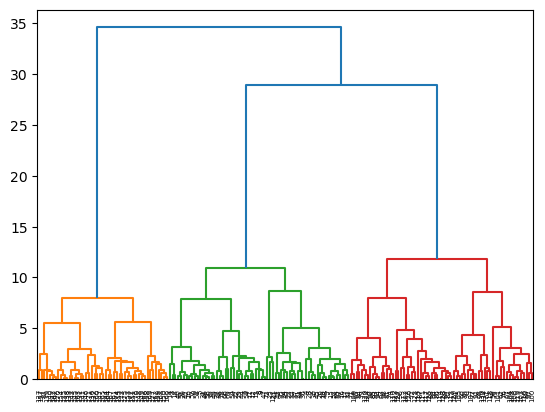

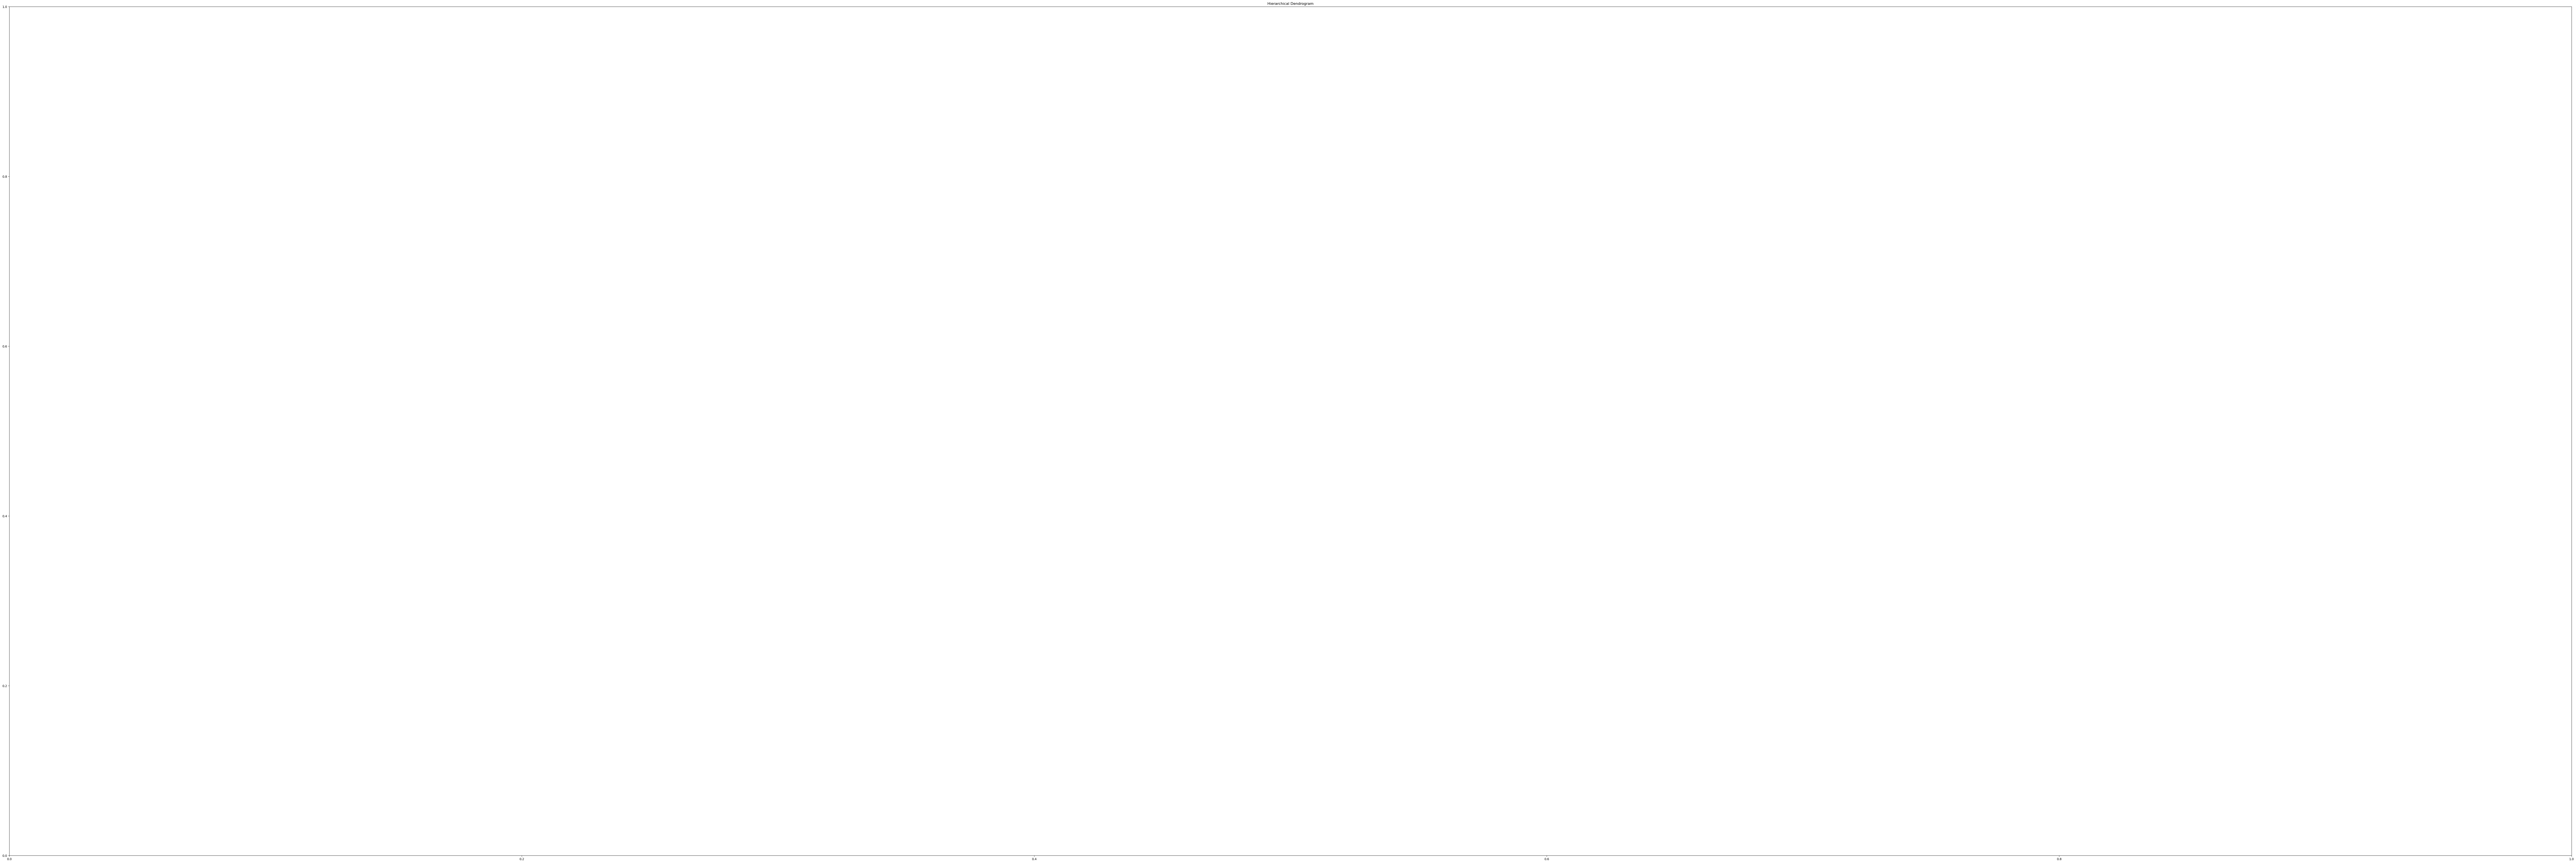

In [26]:
dendrogram = hierarchy.dendrogram(lk)
plt.figure(figsize = (150,50))
plt.title('Hierarchical Dendrogram')
plt.show()

### Model Building

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)

In [28]:
cluster1 = hc.fit_predict(data2)
cluster1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [29]:
data['Cluster'] = cluster1
data

,PC1,PC2,PC3,Type,Cluster
0,3.316751,-1.443463,-0.165739,1,2
1,2.209465,0.333393,-2.026457,1,2
2,2.516740,-1.031151,0.982819,1,2
3,3.757066,-2.756372,-0.176192,1,2
4,1.008908,-0.869831,2.026688,1,2
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,1
174,-2.601956,-1.757229,0.207581,3,1
175,-2.677839,-2.760899,-0.940942,3,1
176,-2.387017,-2.297347,-0.550696,3,1


In [30]:
data.Cluster.value_counts()

0    66
2    65
1    47
Name: Cluster, dtype: int64

### Visualization

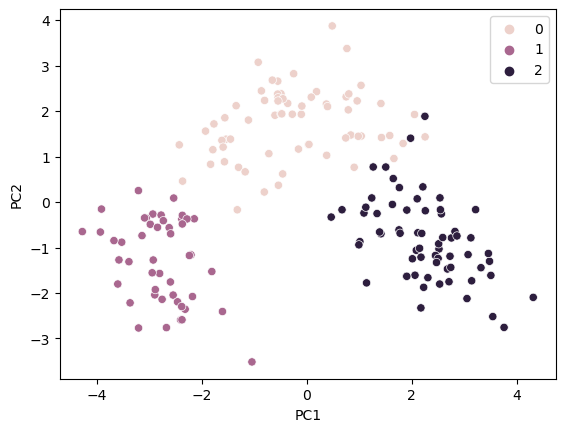

In [31]:
sns.scatterplot(data=data,x='PC1',y='PC2', hue='Cluster')
plt.legend(bbox_to_anchor = (1,1))

# KMeans Clustering

### Model Building

In [32]:
from sklearn.cluster import KMeans
km = KMeans()

### Finding optimal number of clusters using Elbow Graph

In [33]:
wcss = []

for i in range (1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(data2)
    wcss.append(km.inertia_)

In [34]:
wcss

[1539.5034801883048,
 886.1611364823484,
 513.0564645910765,
 429.6196798263024,
 370.2958388368475,
 325.5061145090785,
 288.56478475590416,
 262.9895882711956,
 234.84414782764213,
 219.44221270587485,
 200.61441453127816,
 184.02589083099994,
 174.2723141008634,
 162.28857039288798,
 146.52907768727985,
 139.11675988739722,
 132.0928004796855,
 121.76566773882503,
 119.57413712350272]

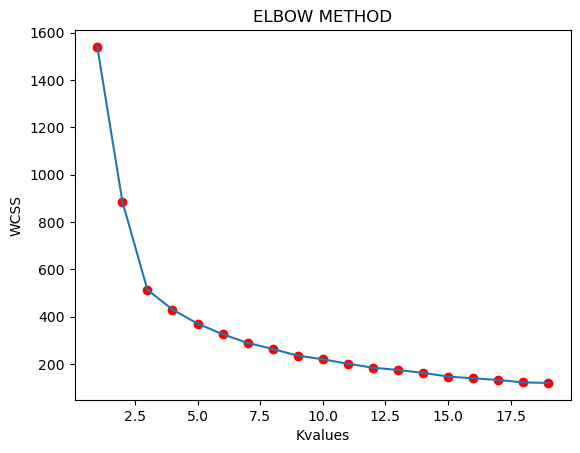

In [35]:
plt.plot(range(1,20), wcss)
plt.scatter(range(1,20), wcss,color = 'red')
plt.title('ELBOW METHOD')
plt.xlabel('Kvalues')
plt.ylabel('WCSS')
plt.show()

K value = 3

### Revised Model

In [36]:
km = KMeans(n_clusters=3)

In [37]:
cluster2 = km.fit_predict(data2)
cluster2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [38]:
data['Cluster2'] = cluster2
data

,PC1,PC2,PC3,Type,Cluster,Cluster2
0,3.316751,-1.443463,-0.165739,1,2,0
1,2.209465,0.333393,-2.026457,1,2,0
2,2.516740,-1.031151,0.982819,1,2,0
3,3.757066,-2.756372,-0.176192,1,2,0
4,1.008908,-0.869831,2.026688,1,2,0
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,1,2
174,-2.601956,-1.757229,0.207581,3,1,2
175,-2.677839,-2.760899,-0.940942,3,1,2
176,-2.387017,-2.297347,-0.550696,3,1,2


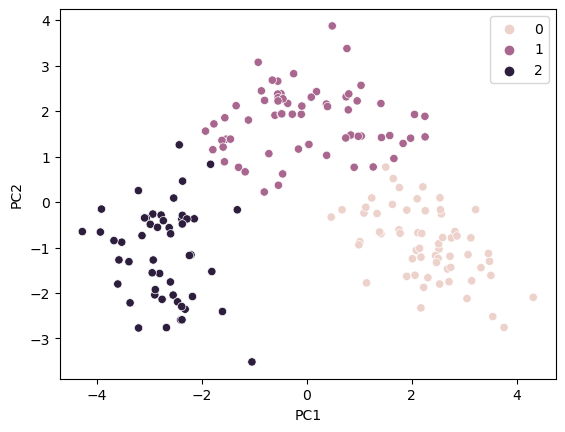

In [39]:
sns.scatterplot(data=data,x='PC1',y='PC2', hue='Cluster2')
plt.legend(bbox_to_anchor = (1,1))

Conclusion: After performing PCA, we reduced the features from 13 to 3. Therefore, selecting relevant features, the computing time got reduced

# End